<a href="https://colab.research.google.com/github/spradeepgit/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
 # Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# CSV file loaction path
file_path= '/content/drive/MyDrive/Almabetter csv files/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

In [4]:
# importing csv file into Pandas dataframe.
netflix_df=pd.read_csv(file_path)

In [5]:
# first 5 rows
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [7]:
# lets check the total rows and columns
netflix_df.shape

(7787, 12)

In [8]:
# shows the datatypes of columns
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [10]:
#lets check the missing values in the row
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64



### *   **Here we seen that columns which have missing values are:**
*   director
*   cast
*   rating
*   country
*   date_added




*   List item



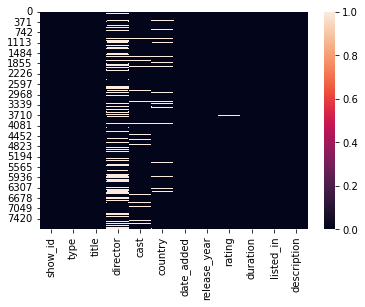

In [11]:
# lets show some visulization on null values
sns.heatmap(netflix_df.isnull())

## **Handling Missing Values**

In [12]:
netflix_df.fillna({'rating':'Unavailable', 'director':'Unavailable', 'cast':'Unavailable','country': 'Unavailable','date_added':'Unaavilable'},inplace=True)
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [13]:
netflix_df[netflix_df.date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


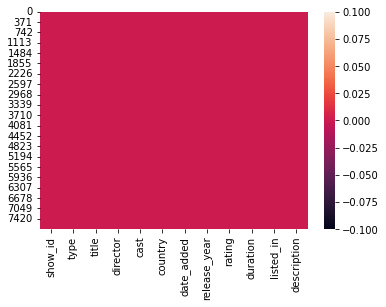

In [14]:
sns.heatmap(netflix_df.isnull())

## **Visualizations:**

In [37]:
#look at type of shows that has been watch on netflix
netflix_df.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'count vs type of shows')

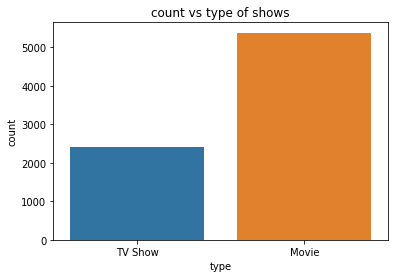

In [38]:
# countplot helps us to plot counts of each category 
sns.countplot(netflix_df['type'])
plt.title('count vs type of shows')

In [39]:
netflix_df['country'].value_counts().head(10)

United States     2555
India              923
Unavailable        507
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: country, dtype: int64

Text(0.5, 1.0, 'Contry Wise Content on Netflix')

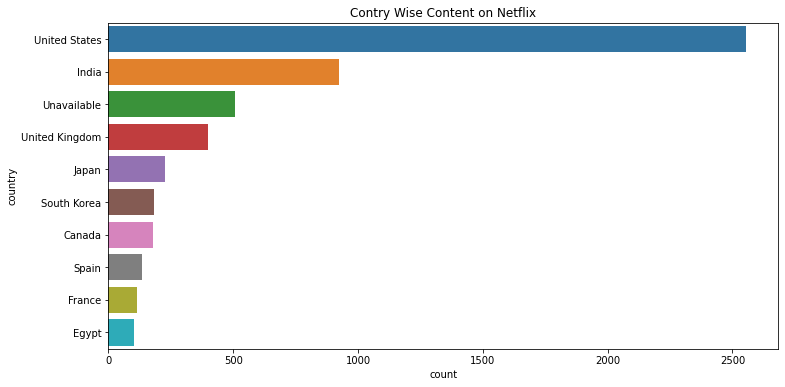

In [40]:
# Visualize the country column 
plt.figure(figsize=(12,6))
sns.countplot(y='country',order= netflix_df['country'].value_counts().index[0:10],data=netflix_df)
plt.title('Contry Wise Content on Netflix')

In [50]:
# Now check type of content based on countries
movie_country=netflix_df[netflix_df['type']=='Movie']
tv_show_country=netflix_df[netflix_df['type']=='TV Show']

Text(0.5, 1.0, 'Top 10 Contries producing movie in Netflix')

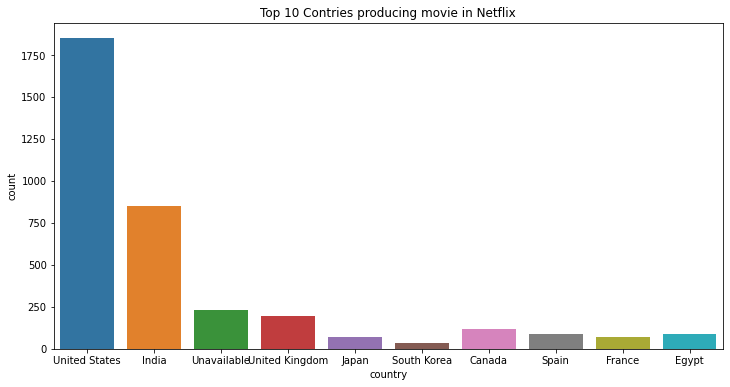

In [44]:
# Visualize the country column 
plt.figure(figsize=(12,6))
sns.countplot(x='country',order= netflix_df['country'].value_counts().index[0:10],data=movie_country,orient="h")
plt.title('Top 10 Contries producing movie in Netflix')

Text(0.5, 1.0, 'Top 10 Contries producing tv shows in Netflix')

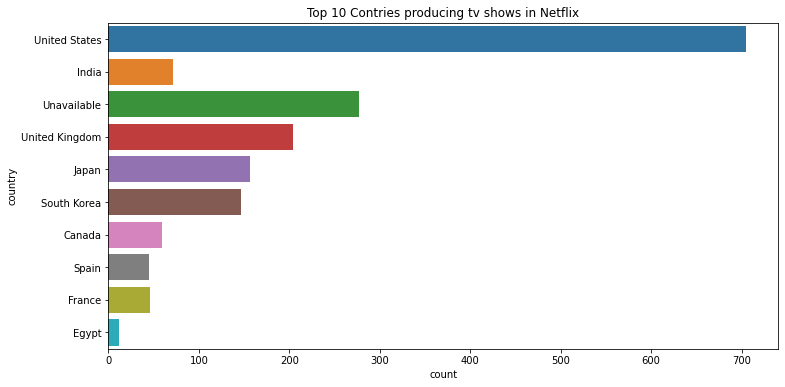

In [58]:

# Visualize the country column 
plt.figure(figsize=(12,6))
sns.countplot(y='country',order= netflix_df['country'].value_counts().index[0:10],data=tv_show_country,orient="h")
plt.title('Top 10 Contries producing tv shows in Netflix')

### Lets check what are the major ratings given to Netflix Shows 

In [60]:
netflix_df.rating.value_counts().reset_index()

,index,rating
0,TV-MA,2863
1,TV-14,1931
2,TV-PG,806
3,R,665
4,PG-13,386
5,TV-Y,280
6,TV-Y7,271
7,PG,247
8,TV-G,194
9,NR,84


Text(0.5, 1.0, 'Ratings of shows in Netflix VS Count')

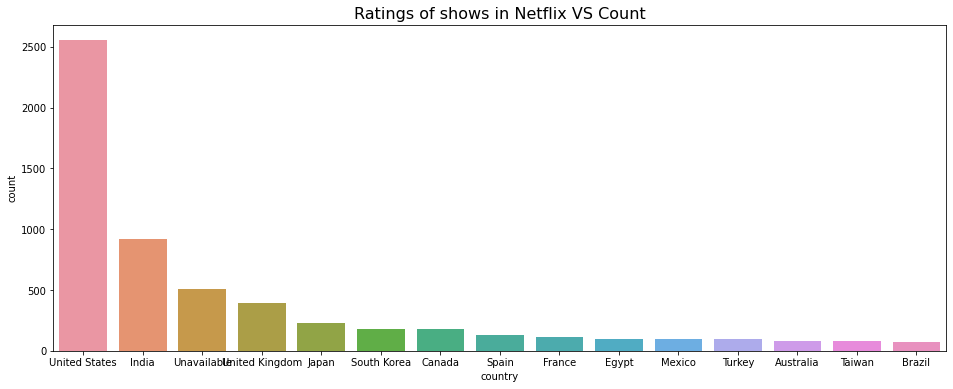

In [97]:
# Visualize the country column 
plt.figure(figsize=(16,6))
sns.countplot(x='country',order= netflix_df['country'].value_counts().index[0:15],data=netflix_df,orient="h")
plt.title('Ratings of shows in Netflix VS Count',size=16)

### As we seen that Highest ratings given by contry is United State
### and lowest rating give by country is Brazil 

